In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats.distributions import chi2
import statsmodels.tsa.stattools as sts 
import seaborn as sns


In [3]:
DOW30_df = pd.read_csv("DOW30_data.csv")
DOW30_train = pd.read_csv("DOW30_train.csv")
DOW30_test = pd.read_csv("DOW30_test.csv")

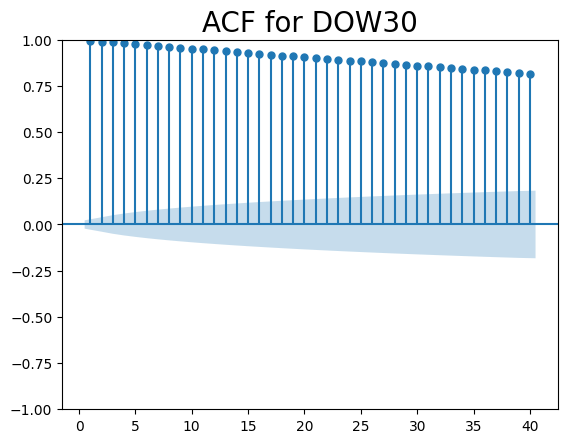

In [4]:
# ACF
sgt.plot_acf(DOW30_df.Close, zero = False, lags = 40)
plt.title("ACF for DOW30", size = 20)
plt.show()


c:\Users\andyz\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\graphics\utils.py:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()


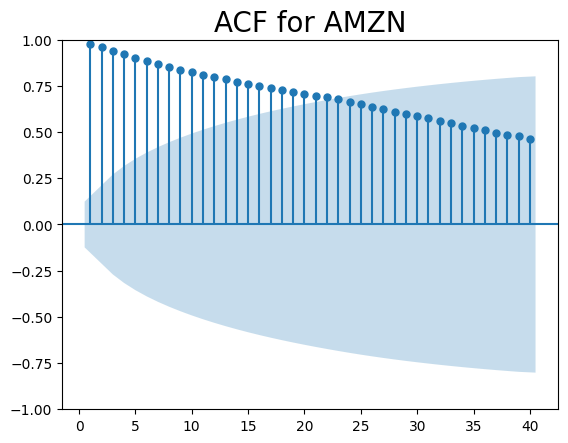

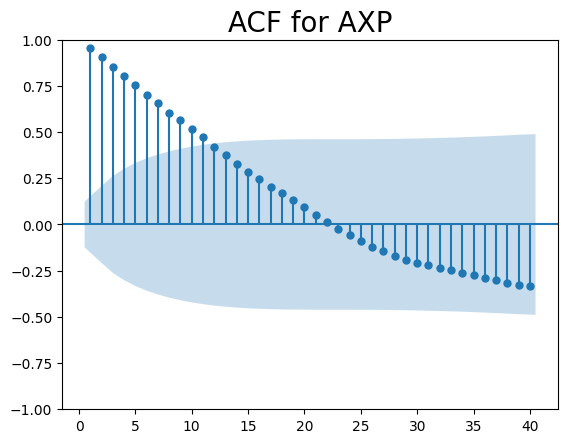

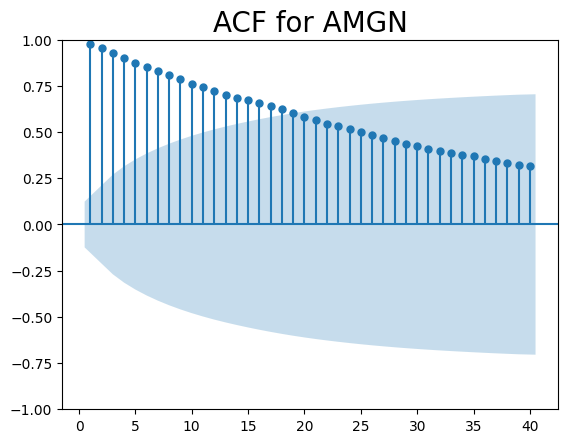

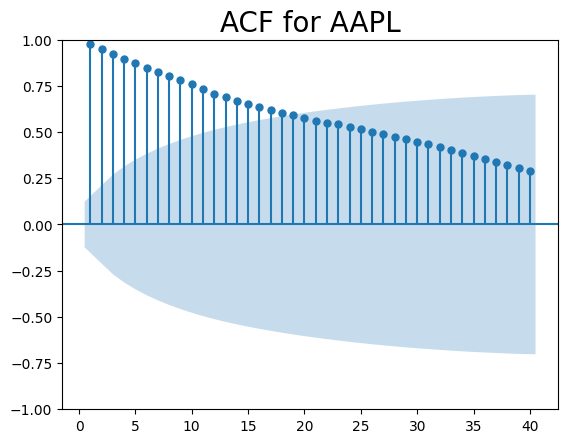

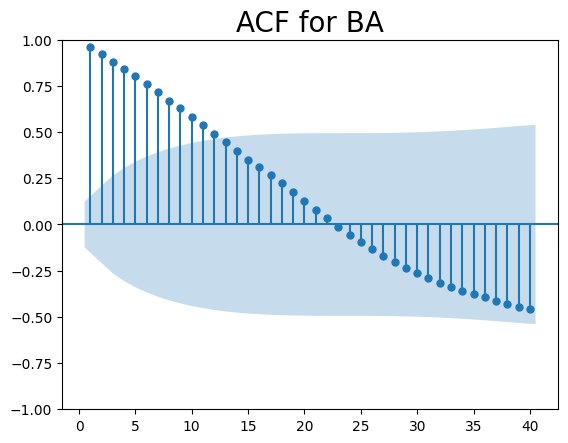

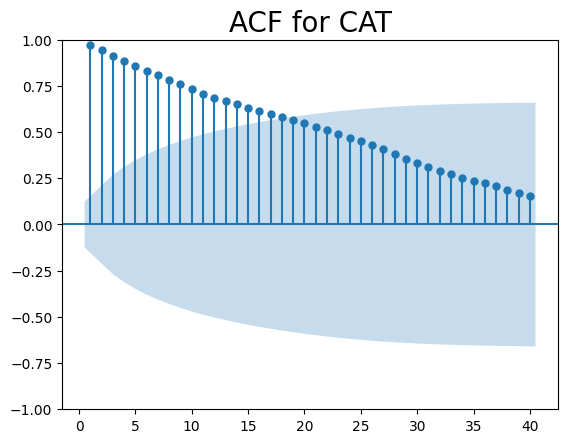

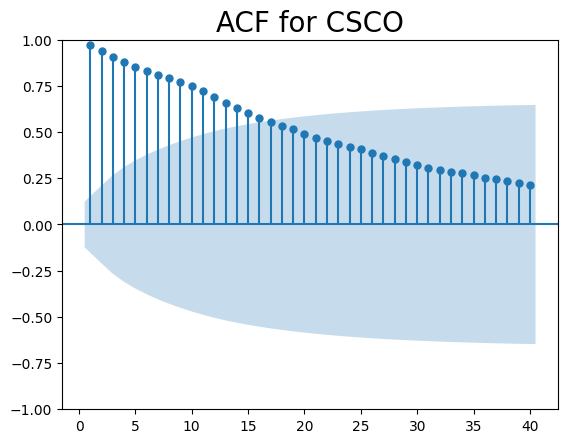

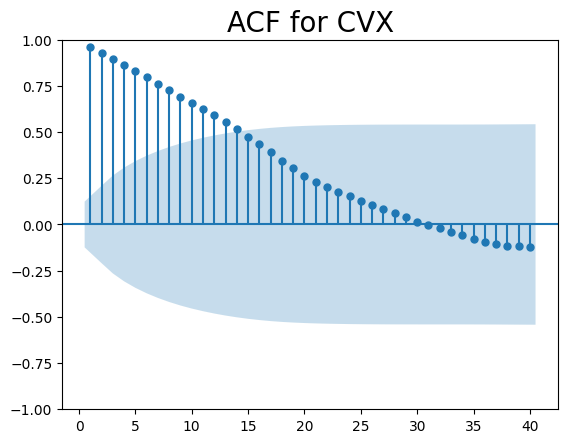

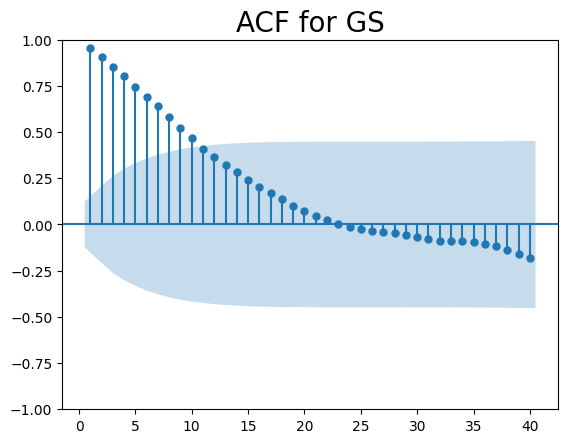

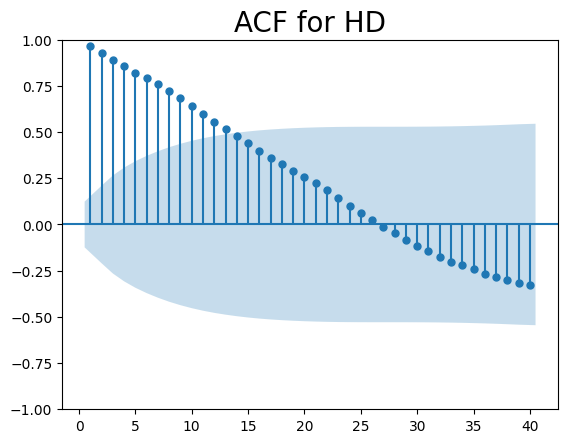

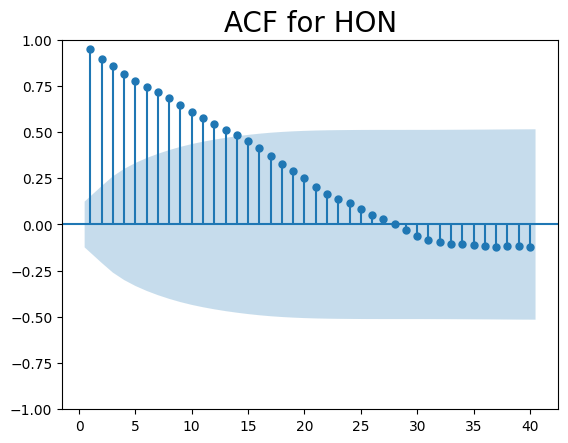

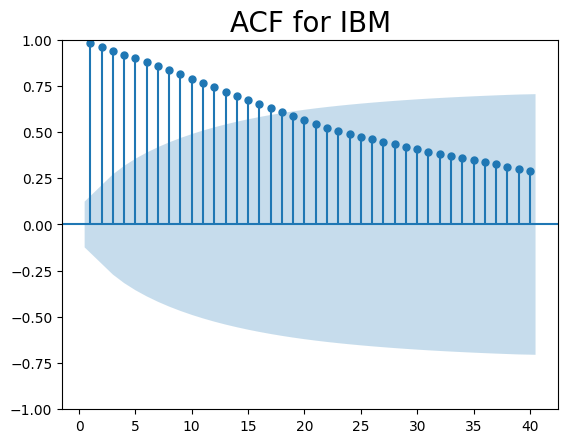

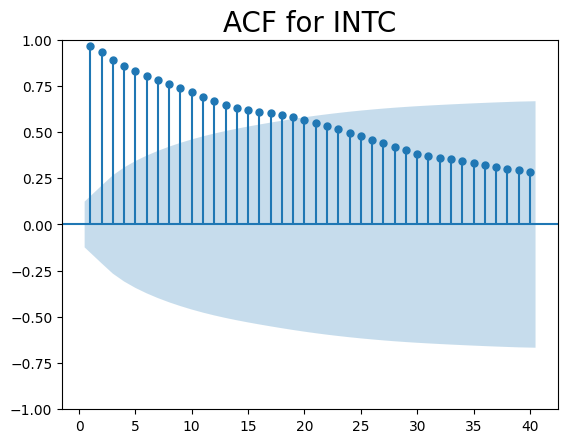

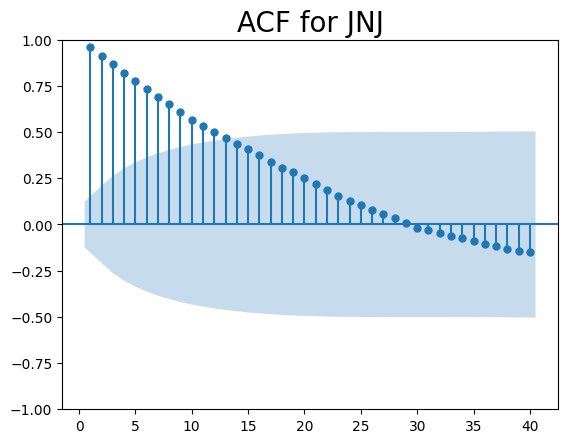

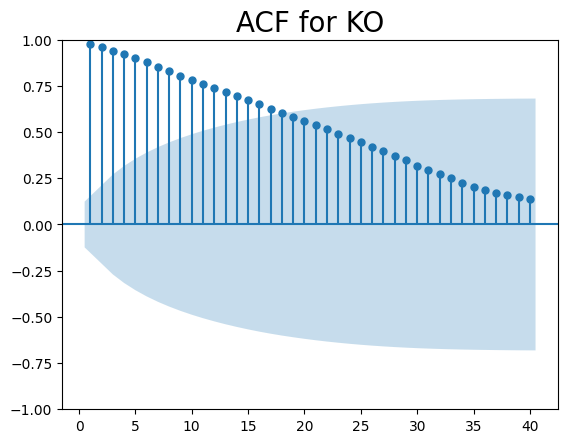

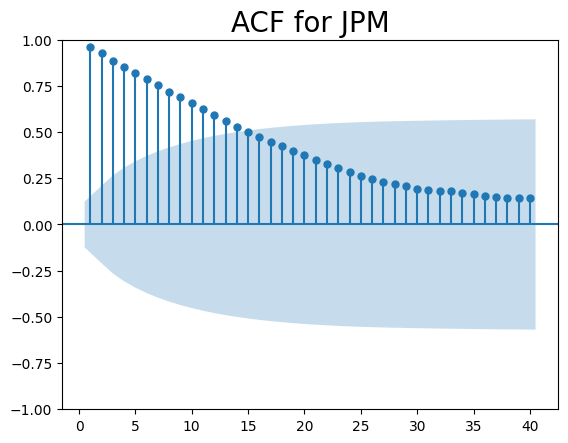

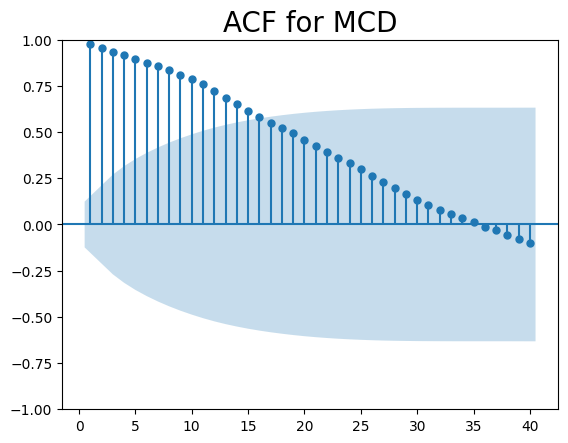

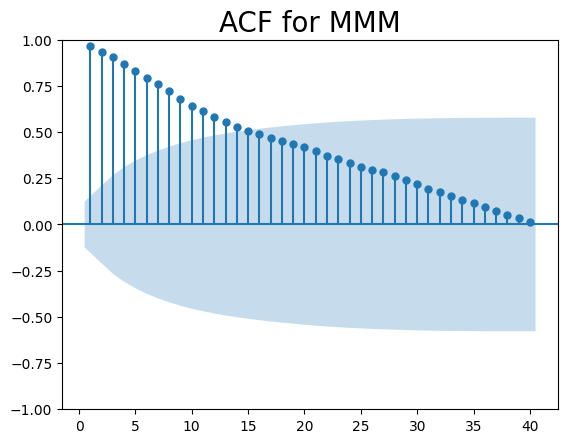

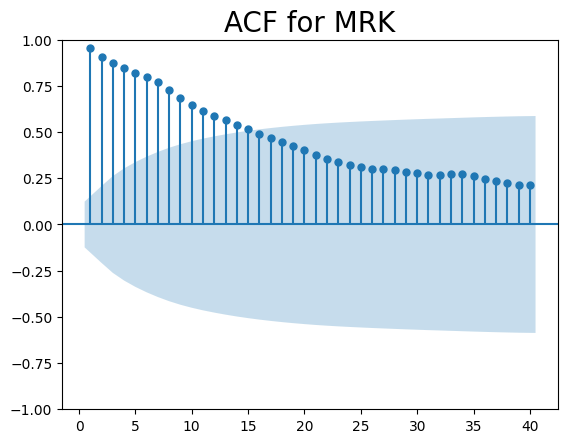

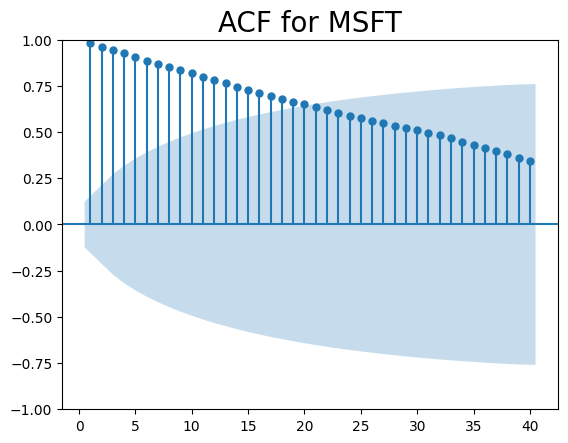

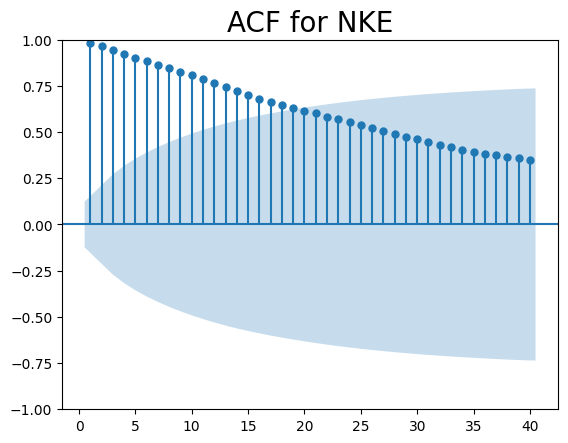

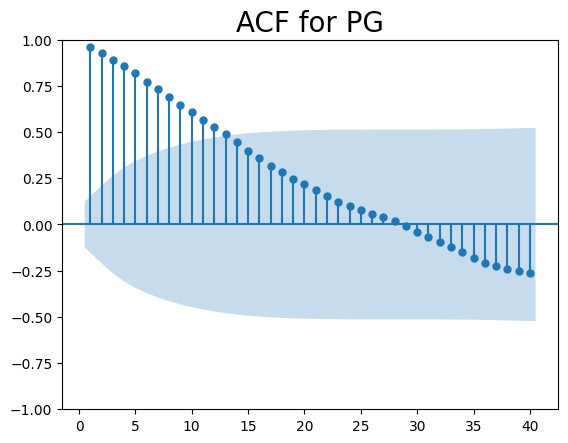

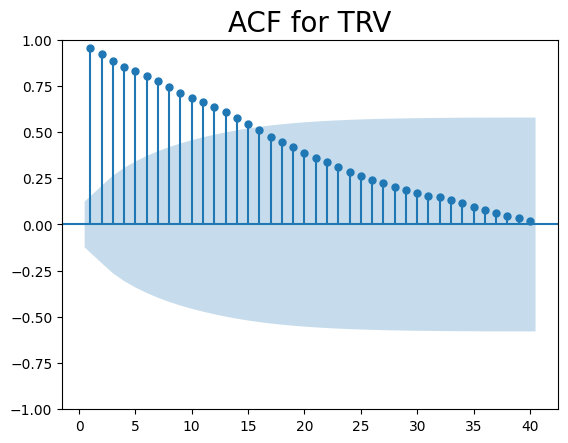

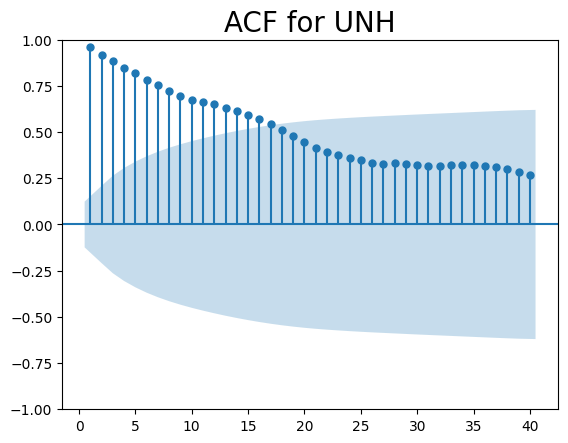

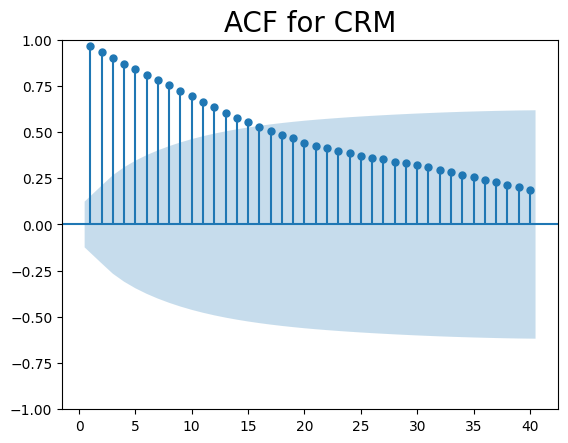

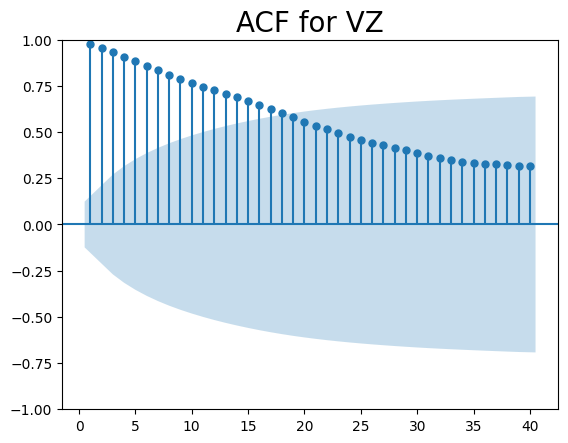

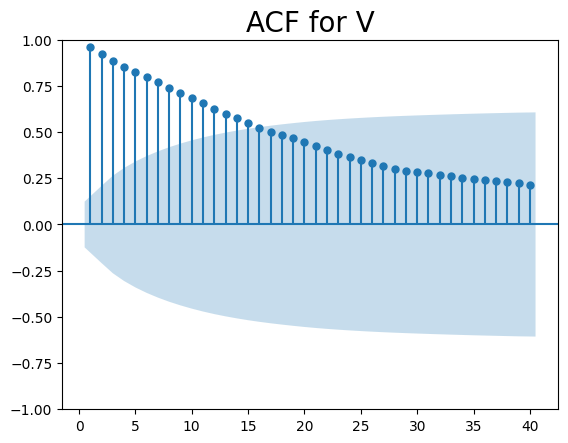

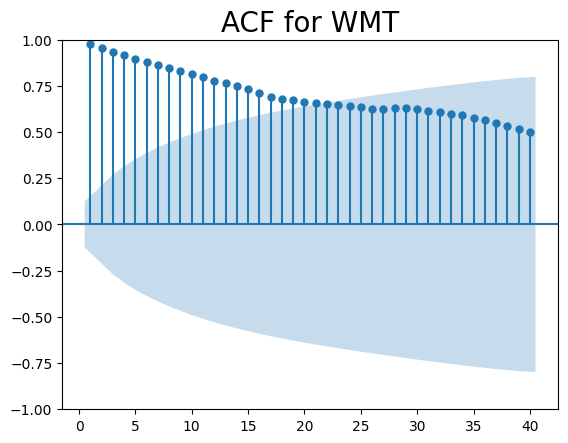

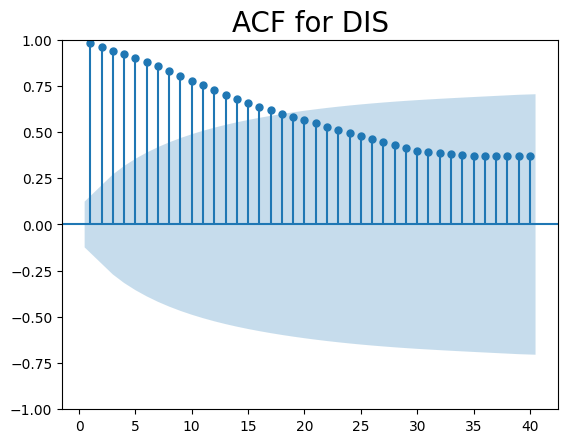

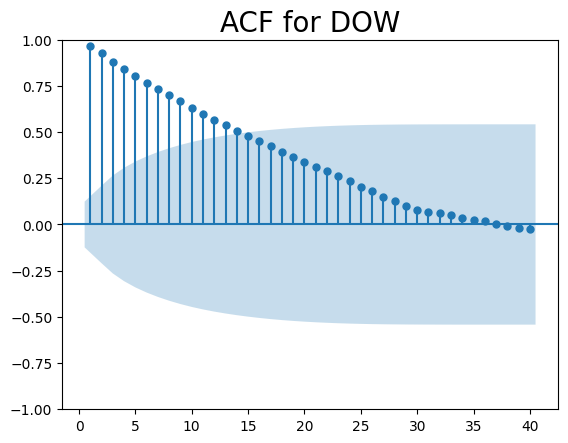

In [7]:
tickers = DOW30_df['ticker'].unique()

for ticker in tickers:
    ticker_df = DOW30_df[DOW30_df['ticker'] == ticker]
    
    sgt.plot_acf(ticker_df['Close'], zero=False, lags=40)
    plt.title(f"ACF for {ticker}", size=20)
    

c:\Users\andyz\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\graphics\utils.py:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()


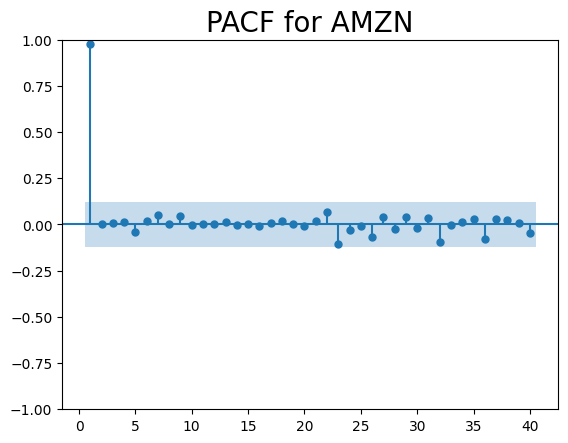

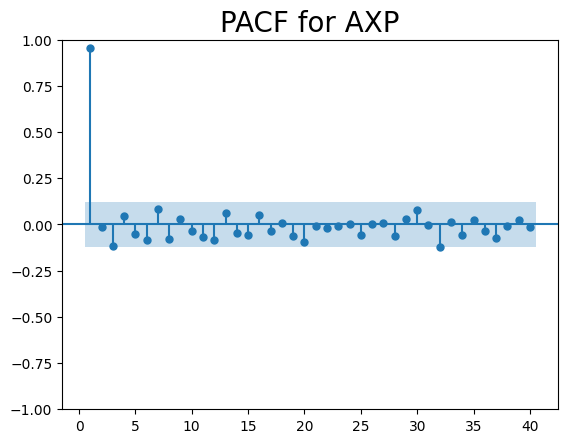

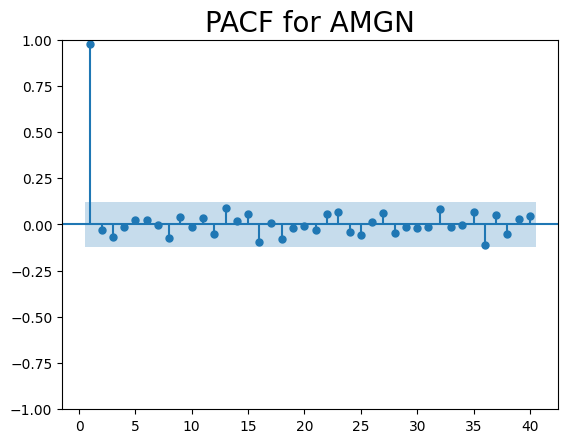

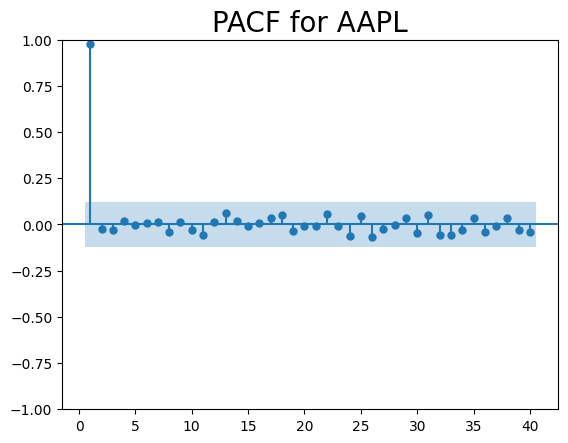

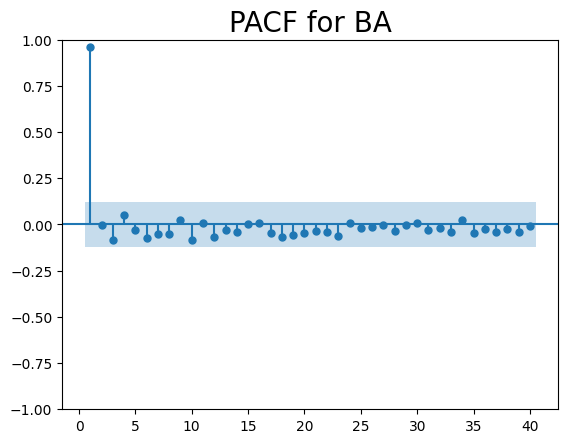

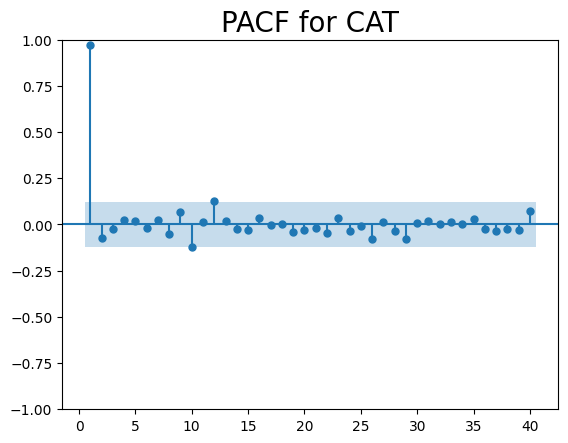

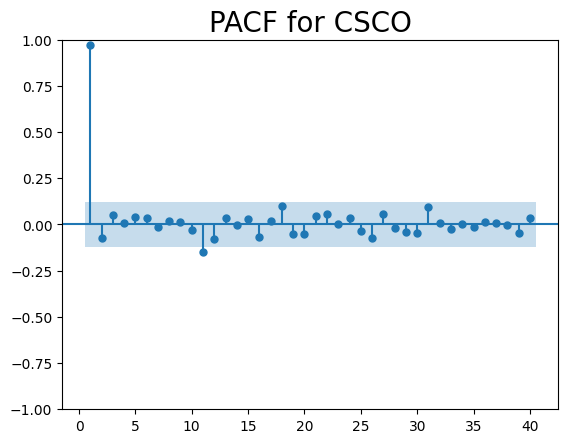

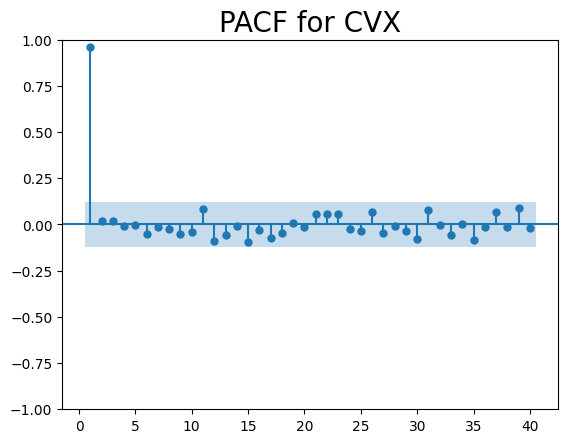

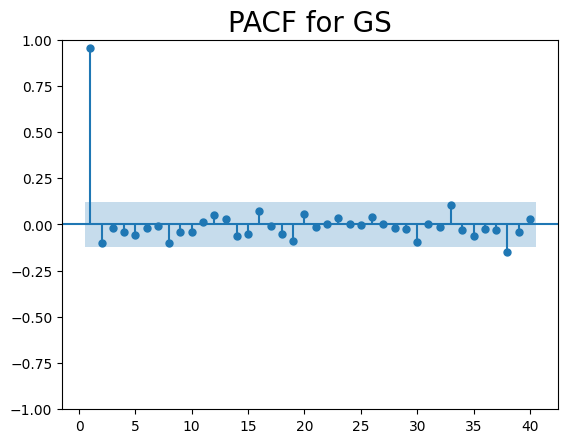

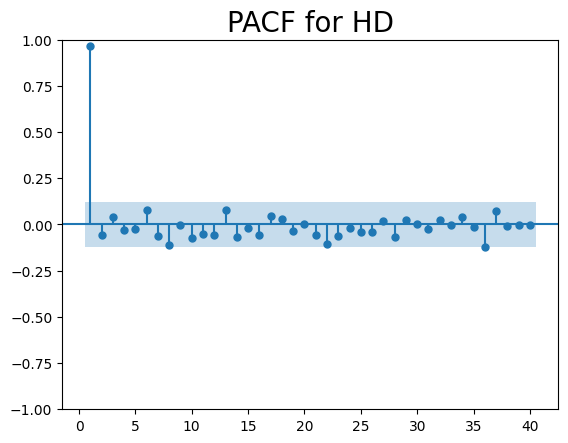

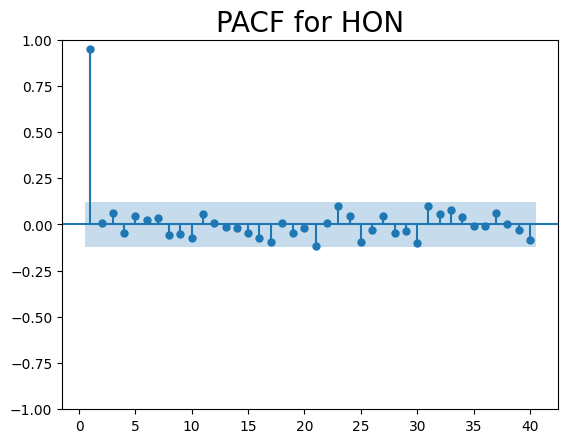

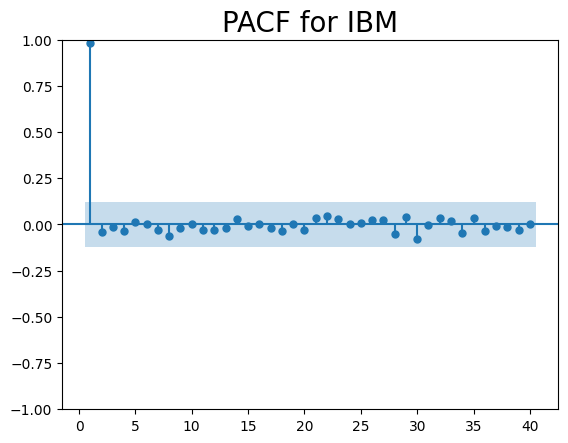

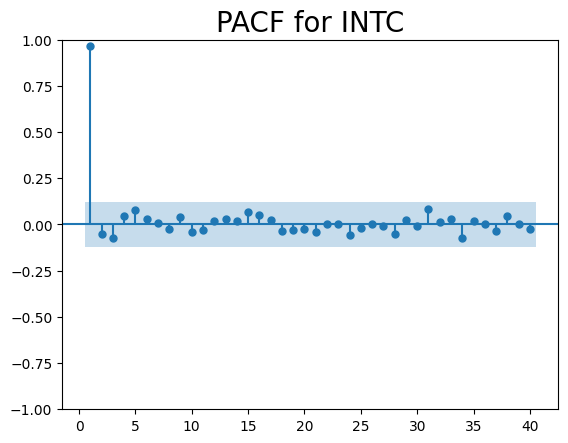

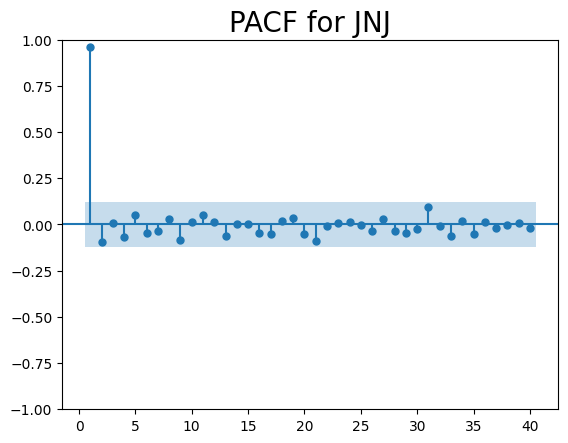

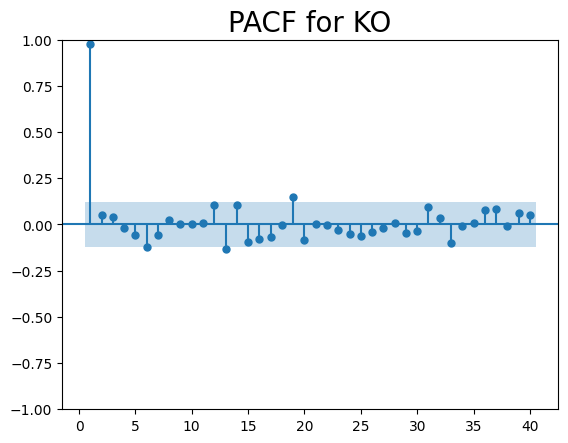

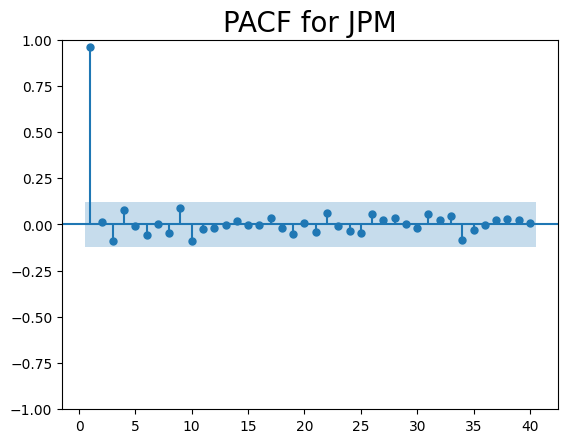

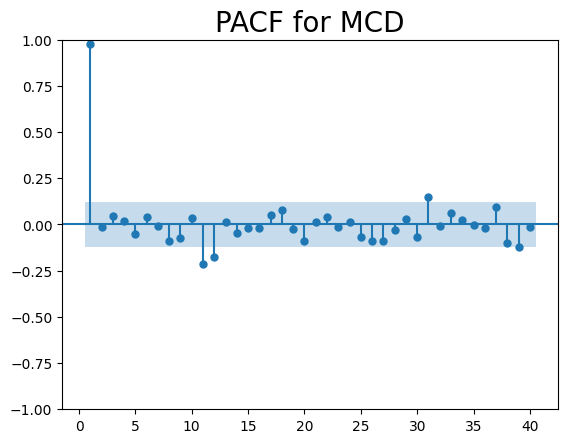

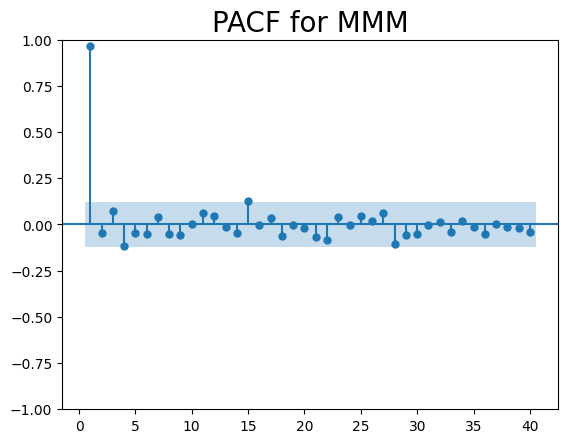

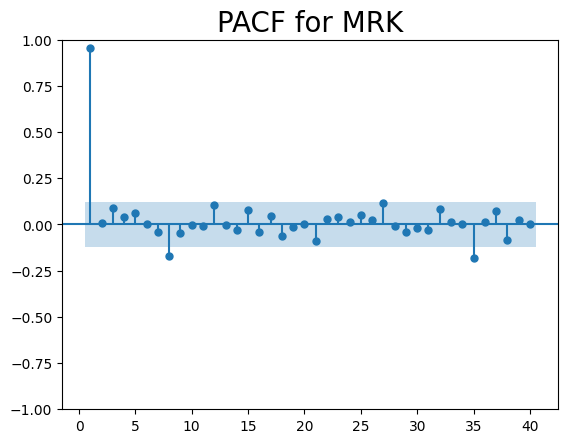

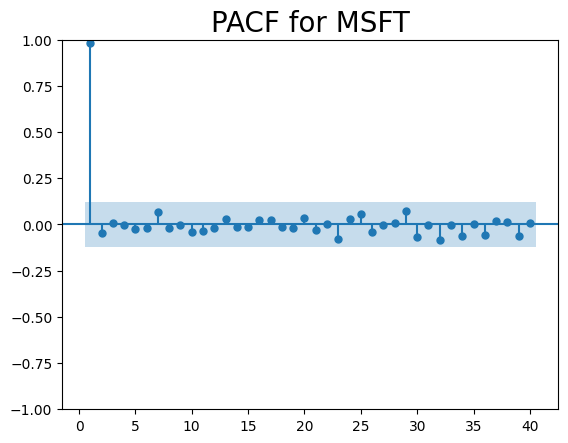

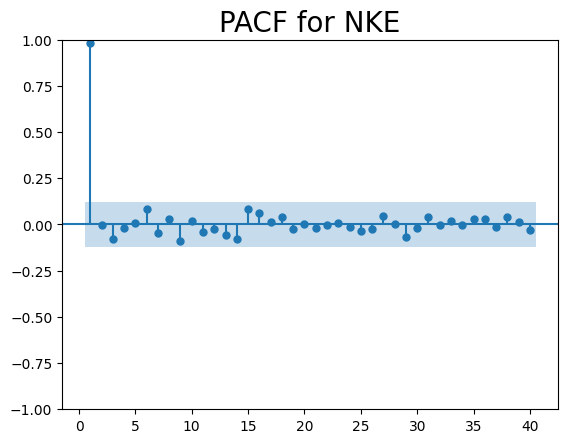

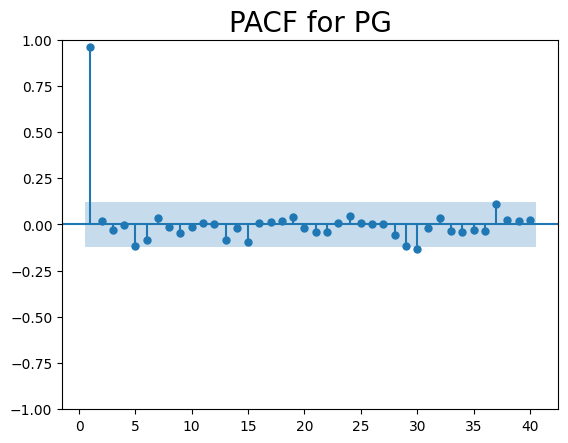

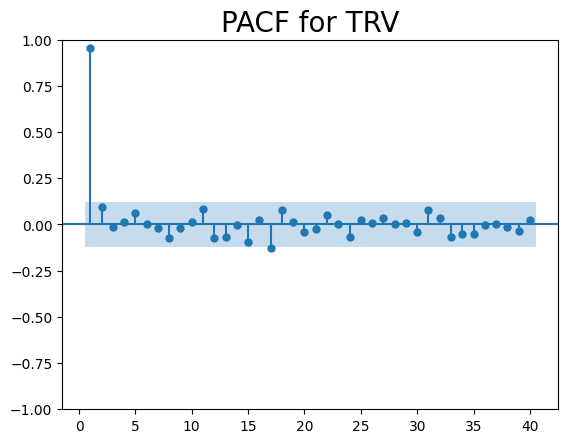

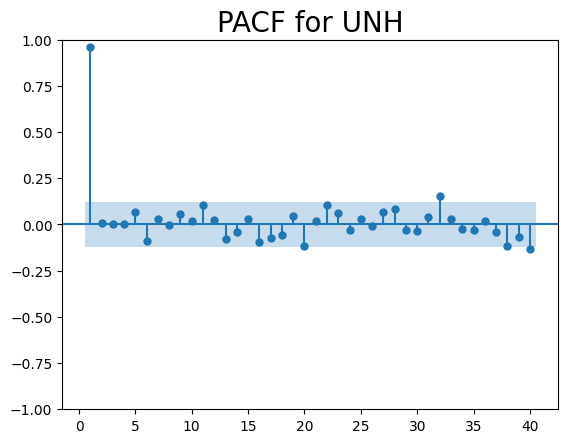

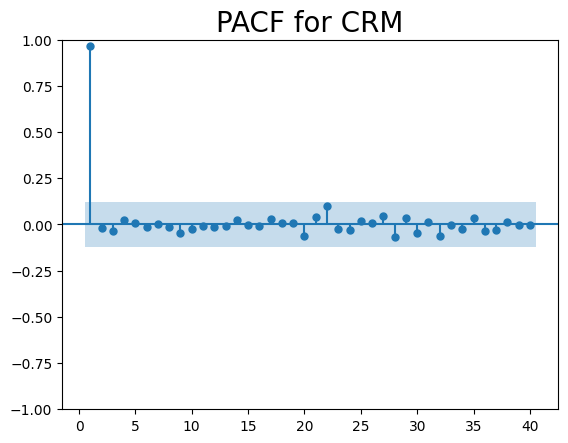

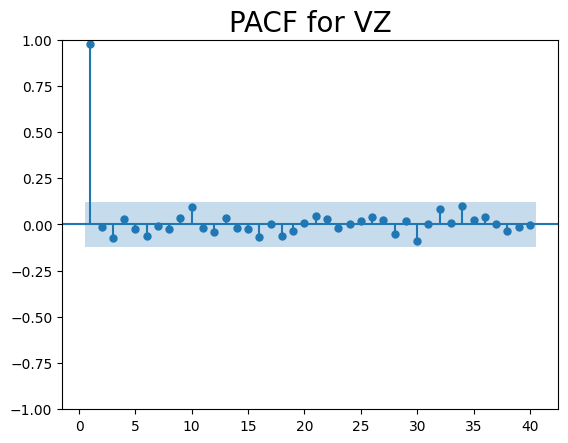

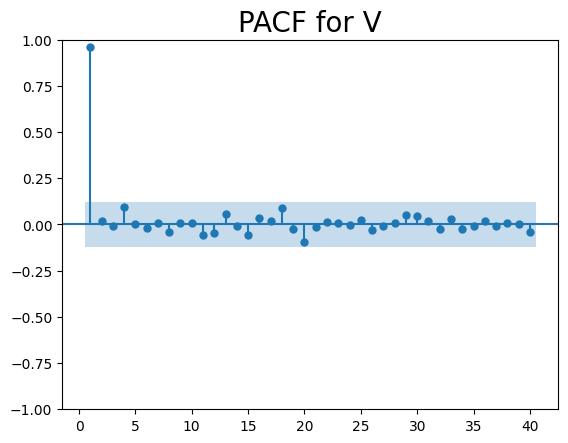

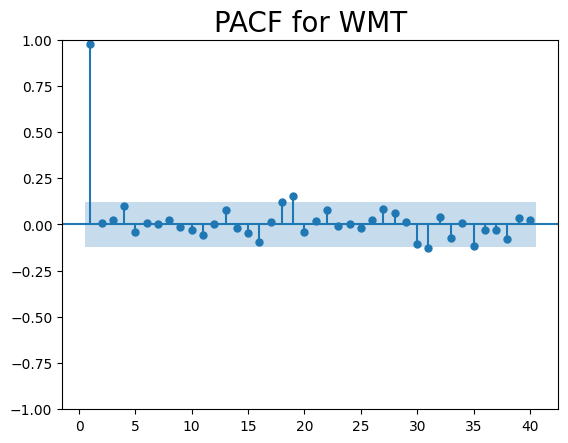

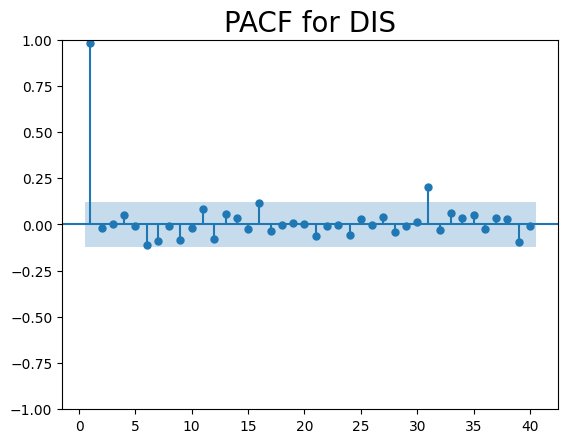

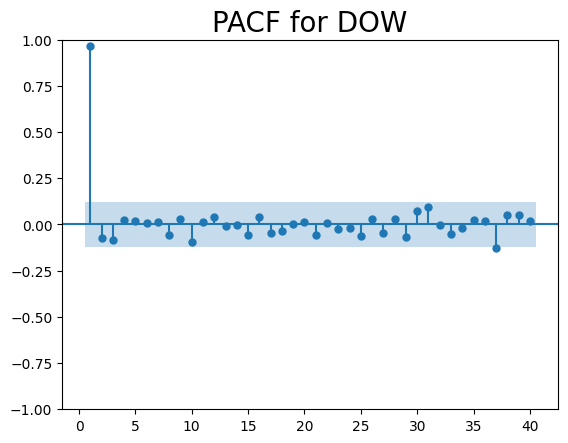

In [21]:
tickers = DOW30_df['ticker'].unique()

for ticker in tickers:
    ticker_df = DOW30_df[DOW30_df['ticker'] == ticker]
    
    sgt.plot_pacf(ticker_df['Close'], zero=False, lags=40)
    plt.title(f"PACF for {ticker}", size=20)
    

In [8]:
from statsmodels.tsa.arima.model import ARIMA

ar_models = {}

for ticker in tickers:
  ticker_df = DOW30_df[DOW30_df['ticker'] == ticker].copy()
  ticker_df.sort_values('Date', inplace=True)
  # order = (p,d,q)
  # p - # of AR terms
  # d - degree of differencing
  # q - # of moving AR terms
  model = ARIMA(ticker_df['Close'], order=(1,0,0))
  result = model.fit()
  ar_models[ticker] = result


c:\Users\andyz\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\andyz\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\andyz\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\andyz\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\andyz\AppData\Local\Programs\Python\Python311\Lib\s

In [9]:
print(ar_models['AAPL'].summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  250
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -546.877
Date:                Fri, 22 Mar 2024   AIC                           1099.755
Time:                        18:12:15   BIC                           1110.319
Sample:                             0   HQIC                          1104.007
                                - 250                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        162.2639     23.125      7.017      0.000     116.940     207.588
ar.L1          0.9973      0.006    162.339      0.000       0.985       1.009
sigma2         4.5549      0.321     14.189      0.0